In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# loading the data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# INDEPENDENT AND DEPENDENT FEATURES
x = iris.data

In [4]:
# data_transfromation pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
data_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=2))
])
data_pipeline

,steps,"[('scaler', ...), ('PCA', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


In [5]:
x_transformed = data_pipeline.fit_transform(x)

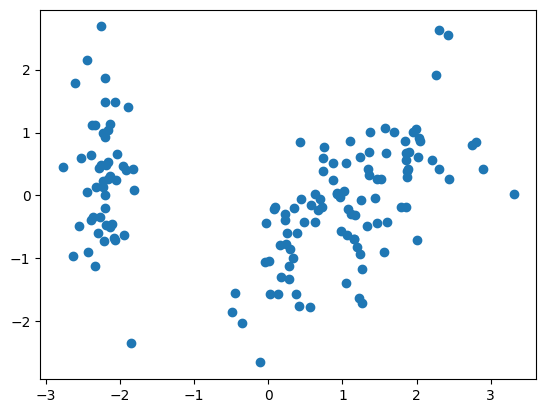

In [6]:
plt.scatter(x_transformed[:,0], x_transformed[:,1])

In [7]:
# aggolmetric clustering
import scipy.cluster.hierarchy as sc

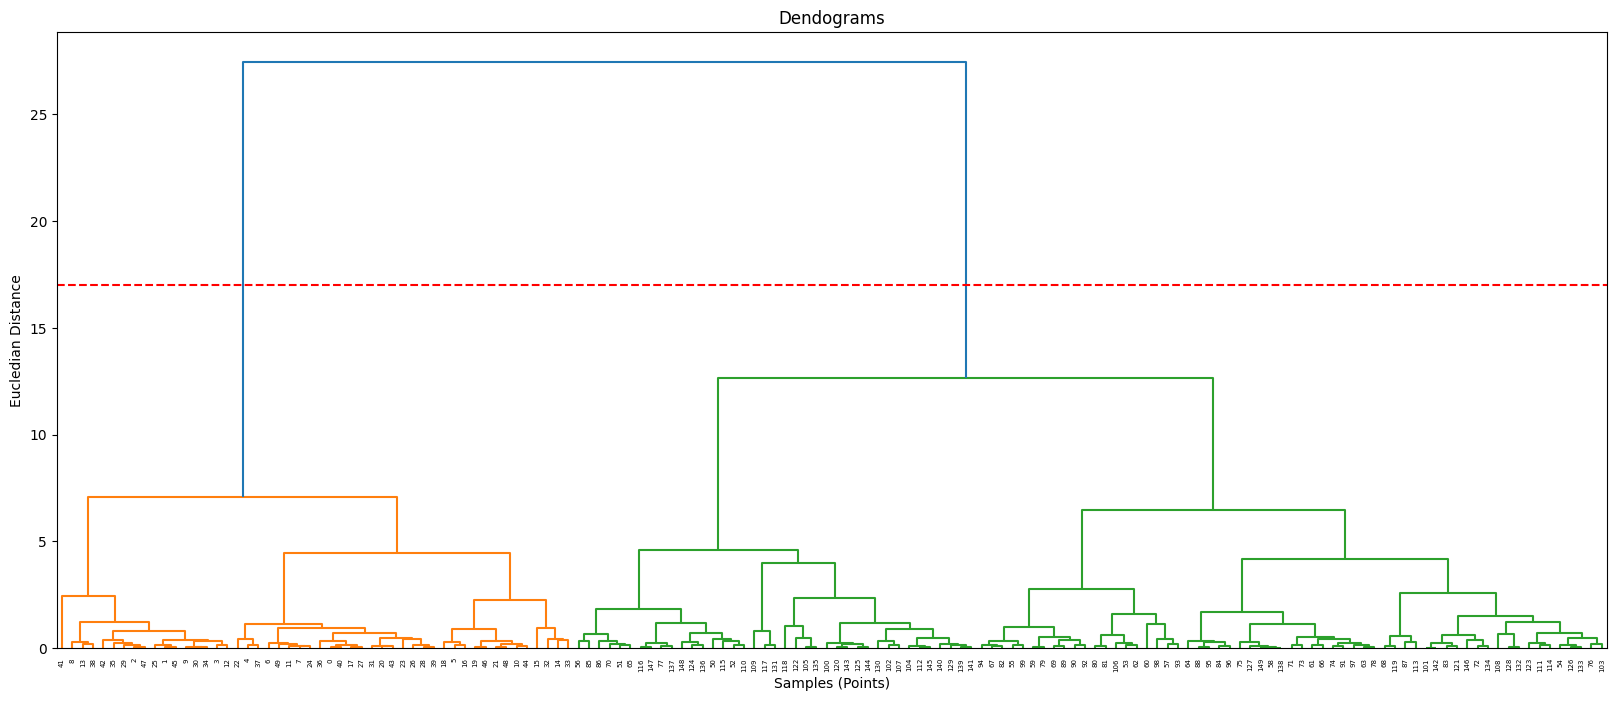

In [8]:
# craeting and ploting dendogram
plt.figure(figsize=(20,8))
plt.title("Dendograms")

sc.dendrogram(sc.linkage(x_transformed, method='ward')) # wrad is for using eucledian distance
plt.xlabel("Samples (Points)")
plt.ylabel("Eucledian Distance")
plt.axhline(y=17, color='r', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(x_transformed)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [10]:
# performance metrics
from sklearn.metrics import silhouette_score
print(f"Best Silhouette Score: {silhouette_score(x_transformed, cluster.labels_)}")

Best Silhouette Score: 0.6145202036230452


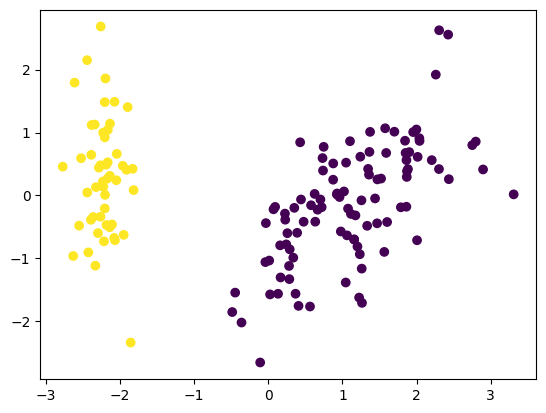

In [11]:
plt.scatter(x_transformed[:,0], x_transformed[:,1], c=cluster.labels_)

In [12]:
silhouette_scores = []
for k in range(2, 12):
    cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    cluster.fit(x_transformed)
    score = silhouette_score(x_transformed, cluster.labels_)
    silhouette_scores.append(score)
silhouette_scores

[0.6145202036230452,
 0.511059598876619,
 0.4487350420958893,
 0.4041689631006267,
 0.3672112889583074,
 0.3706820678912666,
 0.3930552606912111,
 0.4183694466469872,
 0.405420562888949,
 0.4186013055689468]

Text(0.5, 0, 'Silhouette Scores')

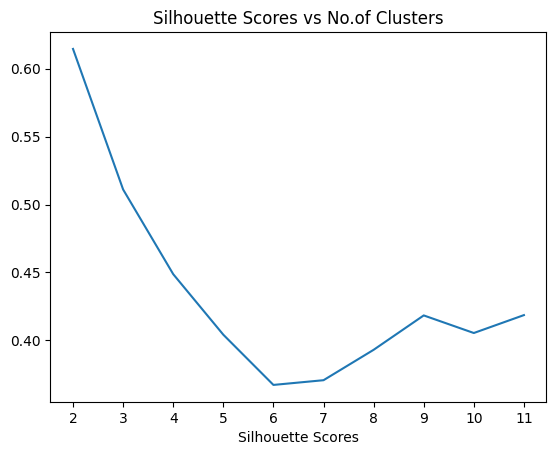

In [13]:
plt.plot(range(2,12),silhouette_scores)
plt.title("Silhouette Scores vs No.of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.xticks(range(2,12))
plt.xlabel("Silhouette Scores")